# Programming tasks: part 1
Required datasets: `iris.csv`, `pima.csv`, `breast-cancer-wisconsin.csv`. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

np.random.seed(123)

## Task 1

### a. 
Import `iris.csv` and gather basic information about the dataset.

First, let's load the dataset to a pandas dataframe and view the first six rows.

In [ ]:
dataframe = pandas.read_csv('iris.csv', header=0)
dataframe.head(6)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


Let's see the shape of the dataframe and what variables we have. Later on we will also need the iris classes to train our models, so let's see how many classes we have. 

In [ ]:
print('Shape of dataframe: ', dataframe.shape)
print('Column names: ', np.array(dataframe.columns))
print('Classes: ', dataframe['class'].unique())

Shape of dataframe:  (150, 5)
Column names:  ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'class']
Classes:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


We can learn a bit more about our data by using the `info` method.

In [ ]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Lastly, we can view some basic statistics using the `describe` method.

In [ ]:
print(dataframe.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Let's convert our pandas dataframe to a numpy array and prepare it for our model training.

In [ ]:
data = dataframe.values
X, y = data[:,:-1], data[:, -1]
print(f'Shape of X: {X.shape}\nShape of y: {y.shape}')
print('Values of y: ', np.unique(y))

Shape of X: (150, 4)
Shape of y: (150,)
Values of y:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


We need to convert our dependent variables to `int` using `LabelEncoder` from `sklearn.preprocessing`.

In [ ]:
y = LabelEncoder().fit_transform(y)
print(np.unique(y))

[0 1 2]


Lastlty let's convert X to `float32` to save some memory space.

In [ ]:
X = X.astype('float32')

### b. 
Using `DecisionTreeClassifier()` create a decision tree for the `iris.csv` dataset.

In [ ]:
model = tree.DecisionTreeClassifier(random_state=123)
model.fit(X, y)

DecisionTreeClassifier(random_state=123)

### c. 
Visualise the decision tree using `plot_tree`.

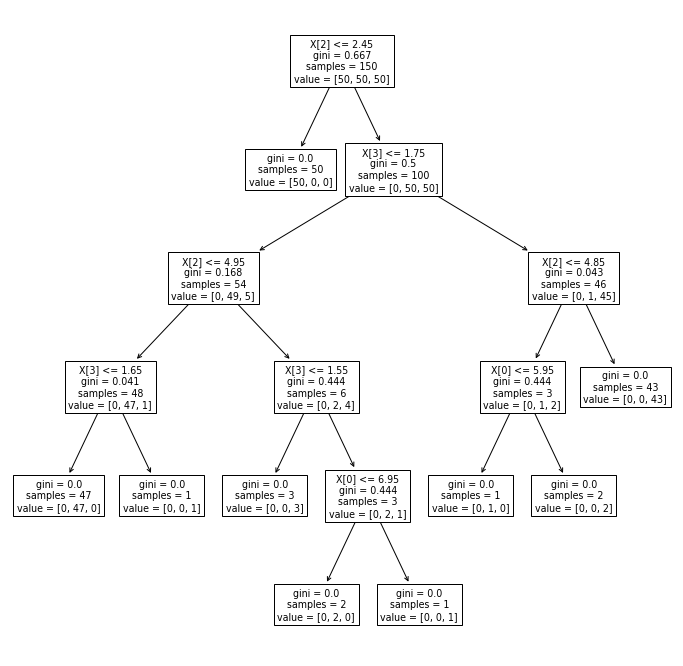

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(model)
plt.show()

The Gini index was used as a splitting criterion. It represnt the classification error made when picking the target calue at random from its distribution.



### d. 
Visualise the decision tree using `graphiz`

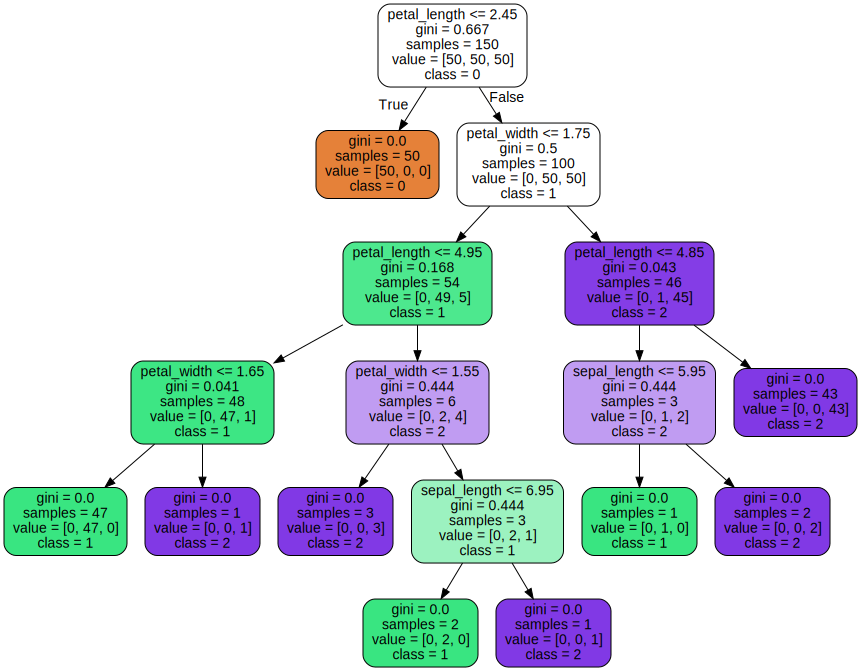

In [ ]:
names = np.array(dataframe.columns)

import graphviz

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=names[:-1], 
                                class_names=['0', '1', '2'],
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph

### e. 
Visualise the tree using `dtreeviz.trees`

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


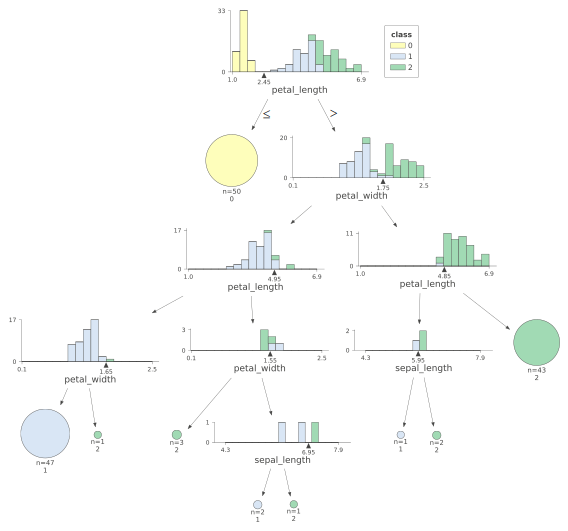

In [ ]:
import dtreeviz
from dtreeviz.trees import dtreeviz
viz = dtreeviz(model, X, y,
                target_name="class",
                feature_names=names[ :-1],
                class_names=['0', '1', '2'])

viz

### f. Visualise the decision tree using `tree.export_text`

In [ ]:
print(tree.export_text(model))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## Task 2

### a. 
Load the `pima.csv` dataset and split it into training and test sets (training set should include 70% of data).

In [ ]:
dataframe = pandas.read_csv('pima.csv', header=0)
dataframe.head()

,times,glucose,blood,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   times     768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   blood     768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataframe['class'].unique()

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = dataframe.values
X, y = data[:,:-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

## b. 
Fit a decision tree model to the training set

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

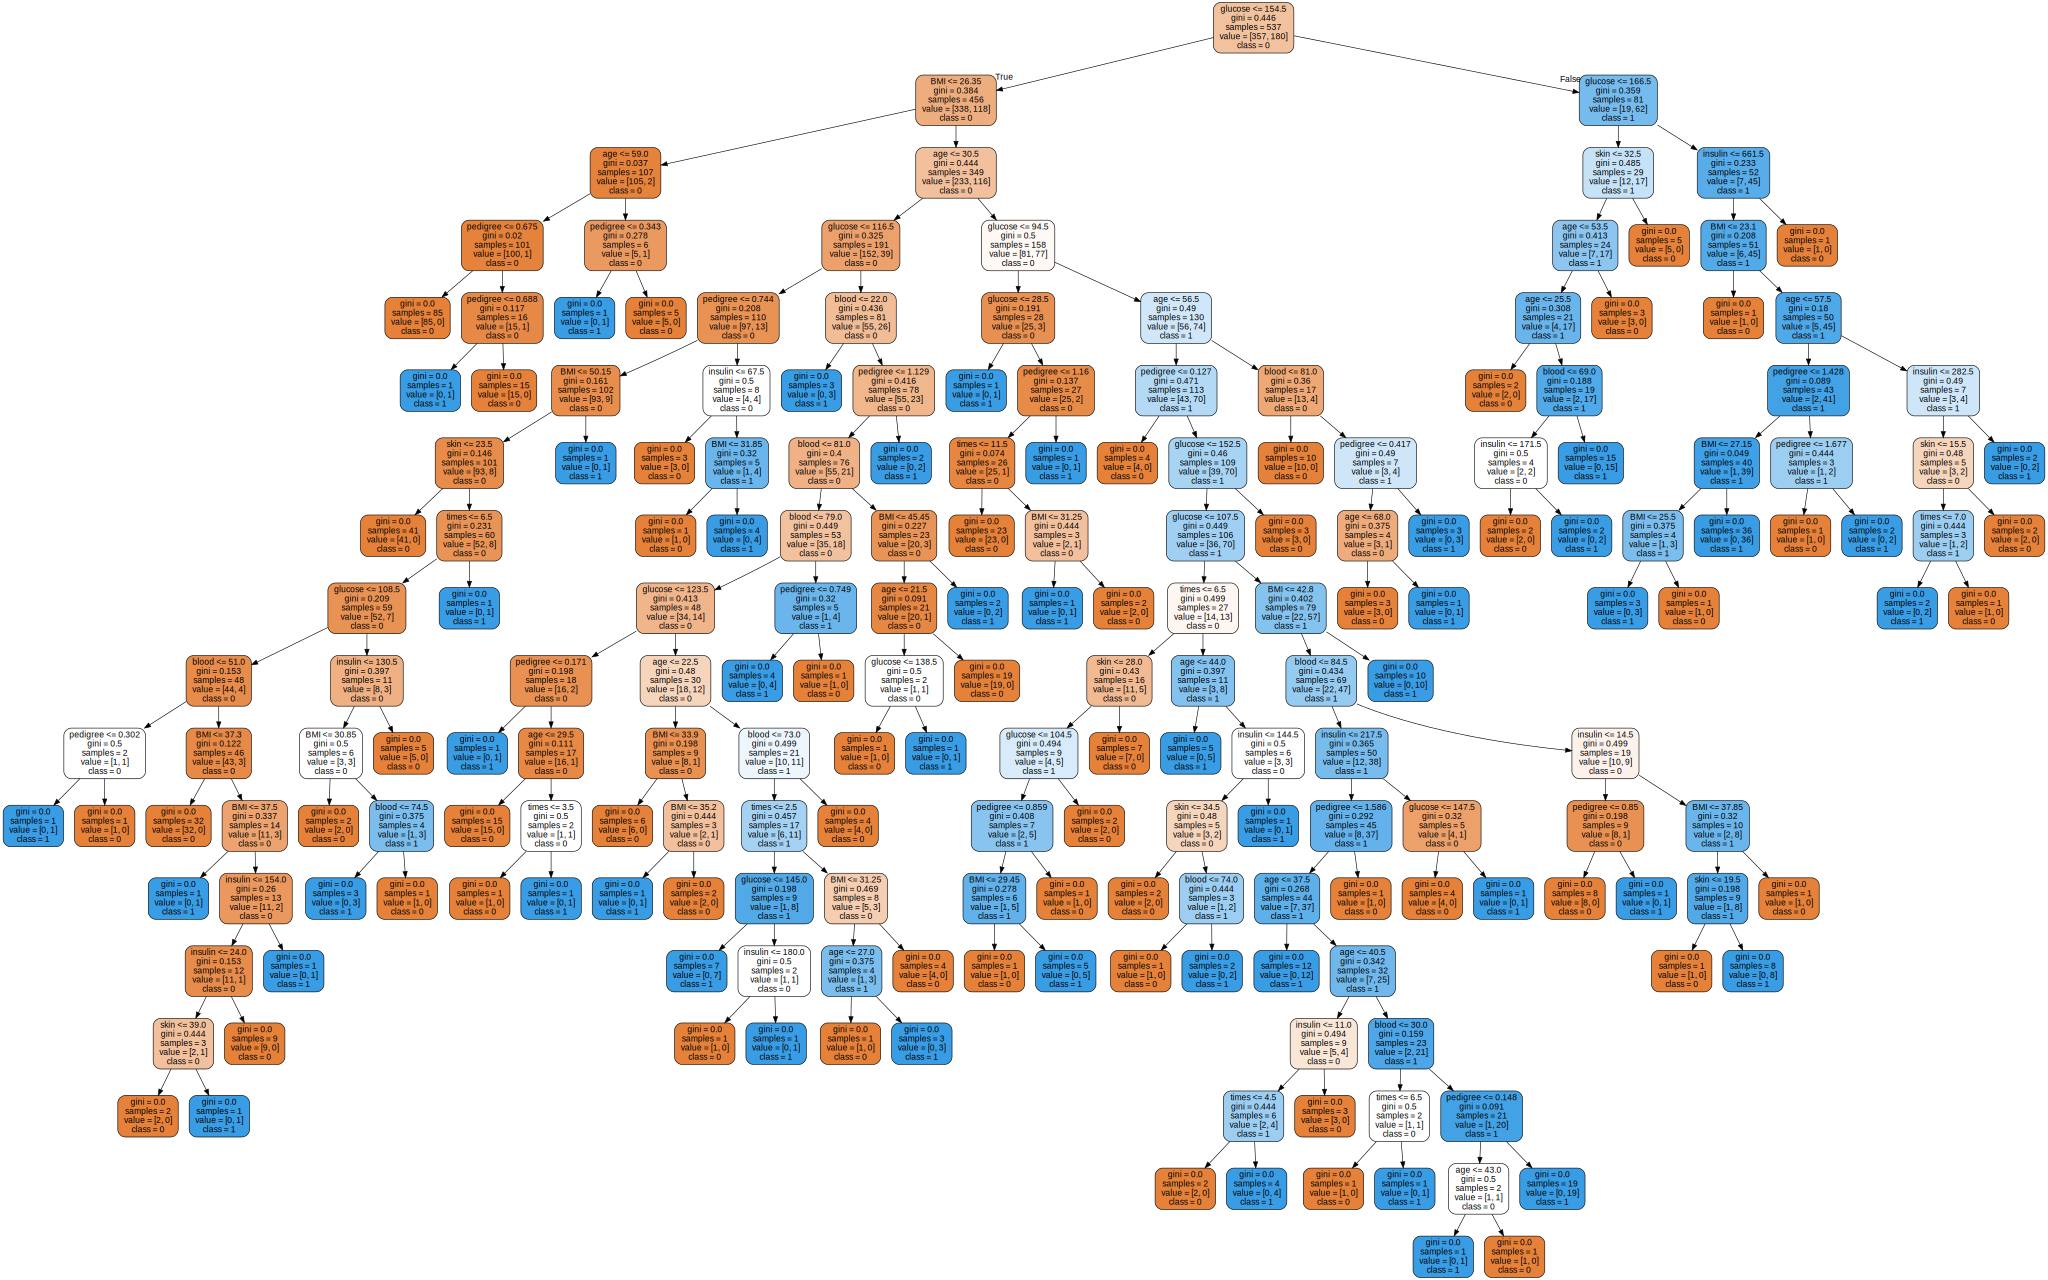

In [ ]:
names = np.array(dataframe.columns)

import graphviz

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=names[:-1], 
                                class_names=['0', '1'],
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph

## c. 
Calculate accuracy, sensitivity, precision and F1 score using the training set

|          |Positive Prediction | Negative Prediction|
| ------   | -- | -- |
| Positive | TP | FN |
| Negative | FP | TN |

*  Accuracy: (TP+TN)/(TP+FP+TN+FN)
*  Sensitivity (Recall): TP/(TP+FN)
*  Precison: TP/(TP+FP)  
* F1-score: 2TP/(2TP+FP+FN)

In [ ]:
pred_train = model.predict(X_train)
df = pandas.DataFrame({'y_train': y_train, 'pred_train': pred_train})

In [ ]:
crosstab = pandas.crosstab(index=df['y_train'], columns=df['pred_train'])

TP = crosstab.loc[1, 1]
FN = crosstab.loc[1, 0]
FP = crosstab.loc[0, 1]
TN = crosstab.loc[0, 0]

print('Accuracy:', (TP+TN)/(TP+TN+FP+FN))
print('Sensitivity:', TP/(TP+FN))
print('Recall:', TP/(TP+FN))
print('F1-score:', TP/(TP+FN))

Accuracy: 1.0
Sensitivity: 1.0
Recall: 1.0
F1-score: 1.0


We can also calculate model accuracy by using the `score` method.

In [ ]:
model.score(X_train, y_train)

1.0

### d. Do the same for the training set.

In [ ]:
pred_test = model.predict(X_test)
df = pandas.DataFrame({'y_test': y_test, 'pred_test': pred_test})
crosstab = pandas.crosstab(index=df['y_test'], columns=df['pred_test'])

TP = crosstab.loc[1, 1]
FN = crosstab.loc[1, 0]
FP = crosstab.loc[0, 1]
TN = crosstab.loc[0, 0]

print('Accuracy:', (TP+TN)/(TP+TN+FP+FN))
print('Sensitivity:', TP/(TP+FN))
print('Recall:', TP/(TP+FN))
print('F1-score:', TP/(TP+FN))

Accuracy: 0.70995670995671
Sensitivity: 0.6022727272727273
Recall: 0.6022727272727273
F1-score: 0.6022727272727273


The model performs perfectly on the training set and considerably worse on the test set. This means our model is overfitted.

### e. 
Do tasks c. and d. using a tree with maximum depth of 5

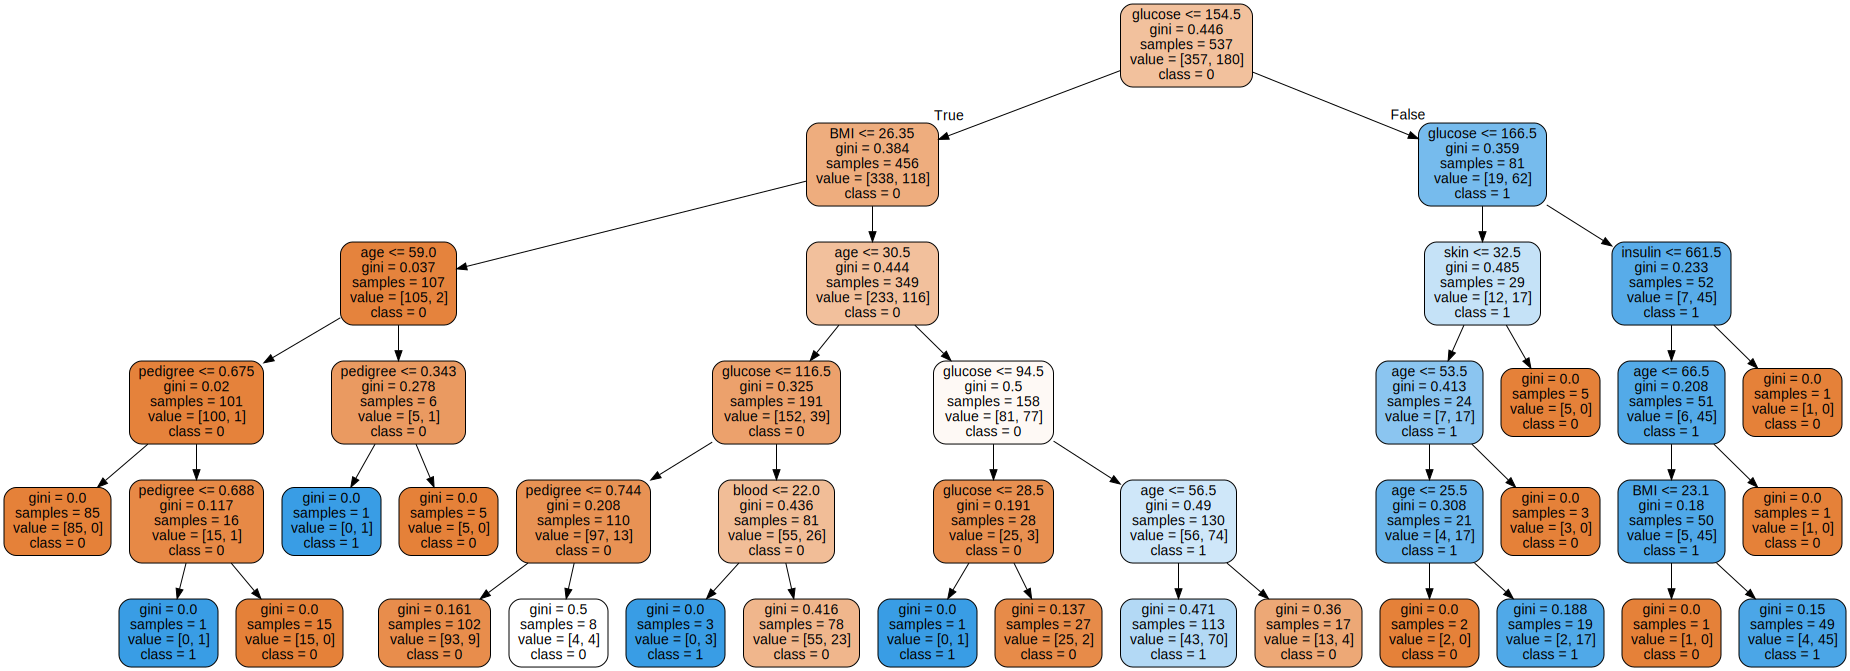

In [ ]:
model = tree.DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

names = np.array(dataframe.columns)

import graphviz

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=names[:-1], 
                                class_names=['0', '1'],
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph

In [ ]:
pred_train = model.predict(X_train)
df = pandas.DataFrame({'y_train': y_train, 'pred_train': pred_train})
crosstab = pandas.crosstab(index=df['y_train'], columns=df['pred_train'])

TP = crosstab.loc[1, 1]
FN = crosstab.loc[1, 0]
FP = crosstab.loc[0, 1]
TN = crosstab.loc[0, 0]

print('Accuracy:', (TP+TN)/(TP+TN+FP+FN))
print('Sensitivity:', TP/(TP+FN))
print('Recall:', TP/(TP+FN))
print('F1-score:', TP/(TP+FN))

Accuracy: 0.8305400372439479
Sensitivity: 0.7666666666666667
Recall: 0.7666666666666667
F1-score: 0.7666666666666667


In [ ]:
pred_test = model.predict(X_test)
df = pandas.DataFrame({'y_test': y_test, 'pred_test': pred_test})
crosstab = pandas.crosstab(index=df['y_test'], columns=df['pred_test'])

TP = crosstab.loc[1, 1]
FN = crosstab.loc[1, 0]
FP = crosstab.loc[0, 1]
TN = crosstab.loc[0, 0]

print('Accuracy:', (TP+TN)/(TP+TN+FP+FN))
print('Sensitivity:', TP/(TP+FN))
print('Recall:', TP/(TP+FN))
print('F1-score:', TP/(TP+FN))

Accuracy: 0.7402597402597403
Sensitivity: 0.6704545454545454
Recall: 0.6704545454545454
F1-score: 0.6704545454545454


By setting a max depth we've managed to improve our model's performance on the test set.

## Task 3

### a. 
Load `breast-cancer-wisconsin.csv` and split the sataset into training and test sets.

There are missing values in the dataset recorded as '?'. We need to take care of that while loading the dataset.

In [ ]:
dataframe = pandas.read_csv('breast-cancer-wisconsin.csv', na_values='?', header=0)
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


In [ ]:
data = dataframe.values
X, y = data[:,:-1], data[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((489, 9), (210, 9), (489,), (210,))

We still need to deal with missing values. We will use `SimpleImputer` from `sklearn.impute` to insert the mean in their place.

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

### b. 
Fit a decision tree to the training set with `max_depth` = 1, 2, ... , 9 and calculate accuracies on the test set


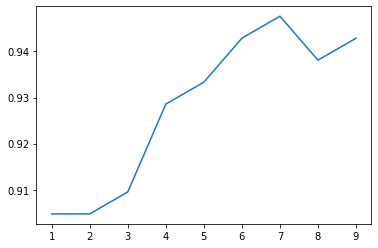

In [ ]:
accs = []
for i in range(1,10):
  model = tree.DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  accs.append(model.score(X_test, y_test))

plt.plot(np.arange(1,10), accs)
plt.show()